In [1]:
from __future__ import print_function, division, absolute_import, unicode_literals
%load_ext autoreload
%autoreload 2

In [1]:
import ipywidgets as widgets
import ppmod
import ppmod.topology as t
from collections import OrderedDict

In [3]:
t.get_segment_distances_dict("ABCDABcd")

OrderedDict([('A', 4), ('B', 4), ('C', 3), ('D', 3)])

In [5]:
topology = "ABCDABcd"
pairs = t.get_complete_pairs_dict_from_topology(topology)

parallel_pairs_list = ["P1:P2", "P3:P4", "P5:P6","P7:P8","P9:P10","P11:P12", "GCNsh:GCNsh"]
antiparallel_pairs_list =["APHsh:APHsh","BCR:BCR", "APH4:APH4"]
#TODO: APH4 is just a guess
segment_strengths_parallel = ["P3:P4", "P1:P2", "P9:P10", "P11:P12", "P5:P6", "GCNsh:GCNsh", "P7:P8"]
segment_strengths_antiparallel = ["APHsh:APHsh", "BCR:BCR", "APH4:APH4"]
types_list = ['SN', 'S', 'A']

widget_dropdown_dict = OrderedDict()
widget_type_dict = OrderedDict()
display_widget_list = []

def is_pair_parallel(pair):
    return pair[0]==pair[1]

def automatic_assignment_click(btn):
    distances = t.get_segment_distances_dict(topology)
    distances = OrderedDict(sorted(distances.items(), key=lambda t: t[1], reverse=True))
    #pairs = t.get_complete_pairs_dict_from_topology(topology)
    
    p_counter, a_counter = 0, 0
    
    for p in distances.keys():
        if is_pair_parallel(pairs[p]):
            widget_dropdown_dict[p].value=segment_strengths_parallel[p_counter]
            p_counter += 1
        else:
            widget_dropdown_dict[p].value=segment_strengths_antiparallel[a_counter]
            a_counter += 1

    save_results_click(btn)    
    
    



def pair_description(pair):
    return str(pair[0])+':'+str(pair[1])

def on_value_change(change):
    print(change['owner'].view_name)
    
def splice_in_type(pair, type):
    """Takes a pair and splices in the type APH:APH -> APHshSN:APHshSN"""
    sp = pair.split(':')
    if len(sp) == 2:
        p1,p2=pair.split(':')
        return p1+type+':'+p2+type
    else:
        return pair

for p, pp in pairs.iteritems():
    if is_pair_parallel(pp):
        option_list = ['None'] + parallel_pairs_list
    else:        
        option_list = ['None'] + antiparallel_pairs_list
    
    pair_dropdown = widgets.Dropdown(
                    options=option_list,
                    value='None',
                    description=pair_description(pp))
    #pair_dropdown.view_name=p
    widget_dropdown_dict[p]=pair_dropdown
    
    type_dropdown = widgets.Dropdown(options=types_list)
    widget_type_dict[p]=type_dropdown                
                    
    
    display_widget_list.append(widgets.HBox([pair_dropdown, type_dropdown]))

        
        

def save_results_click(btn):   
    lines  = []
    for p, pp in pairs.iteritems():
        pair = widget_dropdown_dict[p].value
        pair = splice_in_type(pair, widget_type_dict[p].value)
        l = "{p}->{pair}".format(p=p, pair=pair)
        lines.append(l)
    asignment_textbox.value="\n".join(lines)

    
    if widget_dropdown_dict[topology[0].upper()].value in segment_strengths_parallel[-2:]:
        print("Warning: first segment has weak binding! It is not advisable to put it at the beginning of the chain.")
    if widget_dropdown_dict[topology[-1].upper()].value in segment_strengths_parallel[-2:]:
        print("Warning: las segment has weak binding! It is not advisable to put it at the end of the chain.")              
              
    try:
        ass_dict = t.segment_assignments_to_dict(asignment_textbox.value)        
    except ValueError:
        print("Warning: some segments not assigned!")
        
        
    
save_results_button = widgets.Button(description='Print assignment')
save_results_button.on_click(save_results_click)

asignment_textbox = widgets.Textarea()

automatic_button = widgets.Button(description="Automatic asignment")   
automatic_button.on_click(automatic_assignment_click)


widgets.VBox([
    widgets.VBox(display_widget_list),
    automatic_button,
    save_results_button,
    asignment_textbox,

        
    ])

In [35]:
widget_dropdown_dict[topology[0].upper()].value

u'GCNsh:GCNsh'

In [68]:
pair_dropdown

NameError: name 'pair_dropdown' is not defined

In [9]:
#from https://groups.google.com/forum/#!topic/jupyter/g7GWoIT7CuE
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<IPython.core.display.Javascript object>


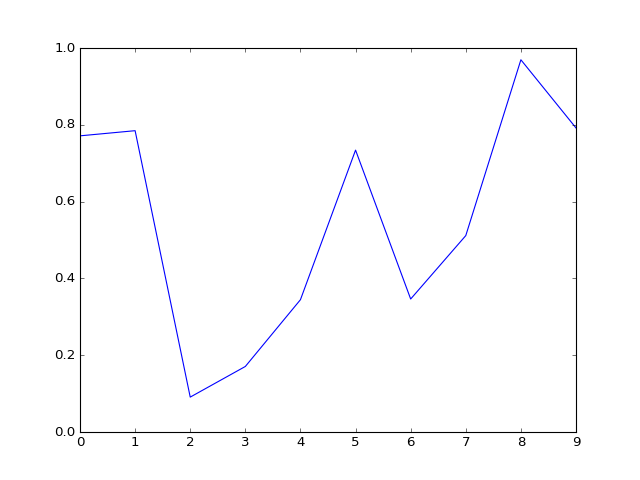

In [21]:

from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from datetime import datetime

fig, ax = plt.subplots()
ax.plot(np.random.rand(10))


wfig = matplotlib.widgets.AxesWidget(ax)
w = widgets.HTML("Event information appears here when you click on the figure")
def onclick(event):
    w.value = str(event)

cid = fig.canvas.mpl_connect('button_press_event', onclick)



btn = widgets.Button(description='Redraw!')
def replot(event):
    #fig, ax = plt.subplots()
    ax.clear()
    ax.plot(np.random.rand(10))
    

btn.on_click(replot)

display(widgets.VBox([w, btn]))


<IPython.core.display.Javascript object>


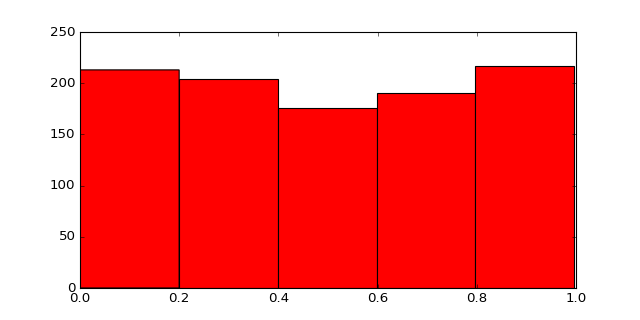

In [9]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import numpy as np
x = np.random.rand(1000)
fig, ax = plt.subplots(figsize=(8,4))
vals, bins, grid = ax.hist(x, color='r', bins=5)

In [17]:
from IPython.display import display
@interact(bins=IntSlider(min=1, max=10, value=5))
def plot(bins):
    
    global grid
    for i in grid:
        i.remove()
    vals, bins, grid = ax.hist(x, bins=bins, color='r')

<IPython.core.display.Javascript object>


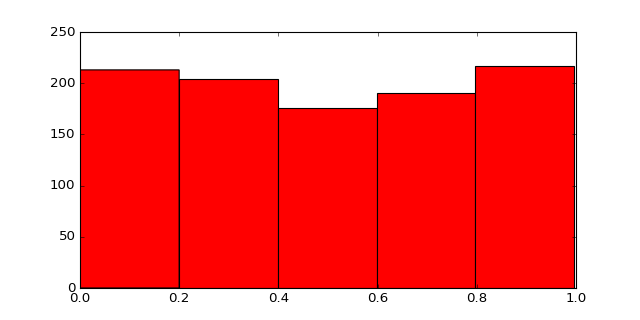

In [19]:
wfig = matplotlib.widgets.AxesWidget(ax)
display(fig)